# Exploratory Data Analysis (EDA) on Titanic Dataset

This notebook performs an exploratory data analysis on the Titanic dataset using Pandas, Matplotlib, and Seaborn.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load and Explore the Data

In [3]:

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Display first 5 rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:

# Check dataset shape (rows, columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check column data types and missing values
df.info()

# Check summary statistics of numerical columns
df.describe()


Dataset contains 891 rows and 15 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handle Missing Data

In [5]:

# Check missing values
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:

# Fill missing 'age' with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'embark_town' with most frequent value
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Drop 'deck' column due to too many missing values
df.drop(columns=['deck'], inplace=True)


C:\Users\drish\AppData\Local\Temp\ipykernel_26680\1622607122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\drish\AppData\Local\Temp\ipykernel_26680\1622607122.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

# Removing Duplicates

In [7]:
# Check duplicates

print("Duplicates:", df.duplicated().sum())

Duplicates: 116


In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


# Handling Outliers

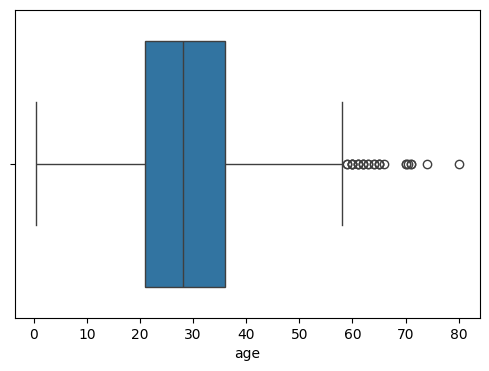

In [9]:
# Boxplot to check outliers in 'age'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.show()


In [12]:
# Remove outliers using IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit,upper_limit)

# Remove outliers
df = df[(df['age'] >= lower_limit) & (df['age'] < upper_limit)]
df


0.0 56.0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


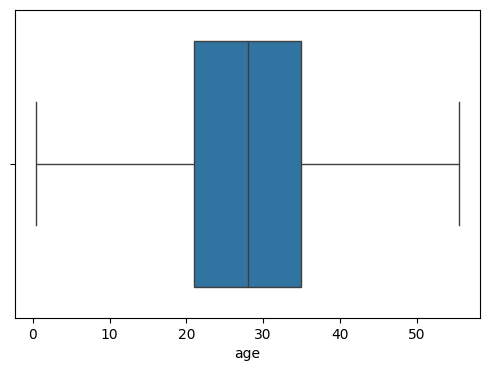

In [13]:
# Boxplot to check outliers in 'age'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.show()

## Univariate Analysis

C:\Users\drish\AppData\Local\Temp\ipykernel_26680\3728771660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='coolwarm')


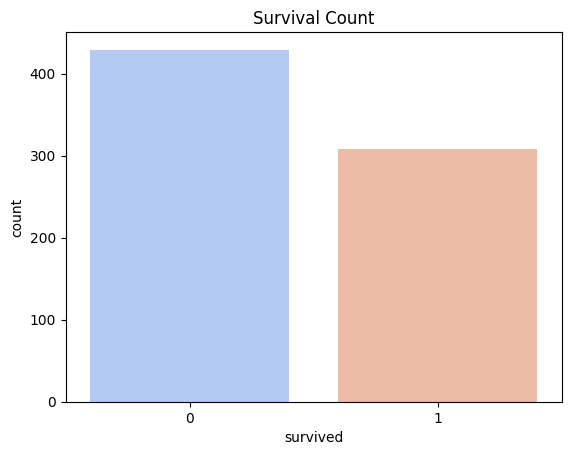

In [14]:

# Countplot for survival
sns.countplot(x='survived', data=df, palette='coolwarm')
plt.title("Survival Count")
plt.show()


In [15]:

# Survival rate percentage
survival_rate = df['survived'].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")


Survival Rate: 41.79%


C:\Users\drish\AppData\Local\Temp\ipykernel_26680\1554975245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=df, palette='viridis')


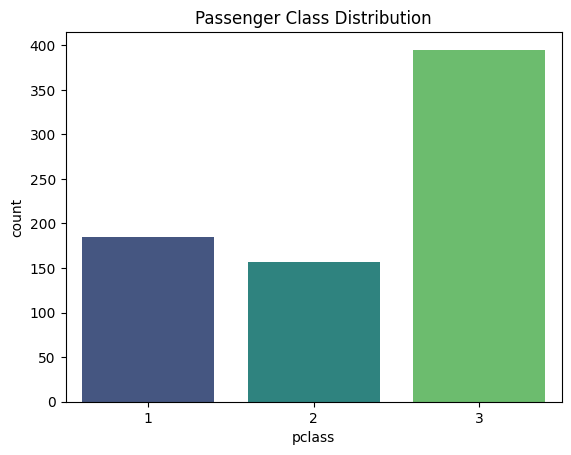

In [16]:

# Passenger Class Distribution
sns.countplot(x='pclass', data=df, palette='viridis')
plt.title("Passenger Class Distribution")
plt.show()


C:\Users\drish\AppData\Local\Temp\ipykernel_26680\3561584385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


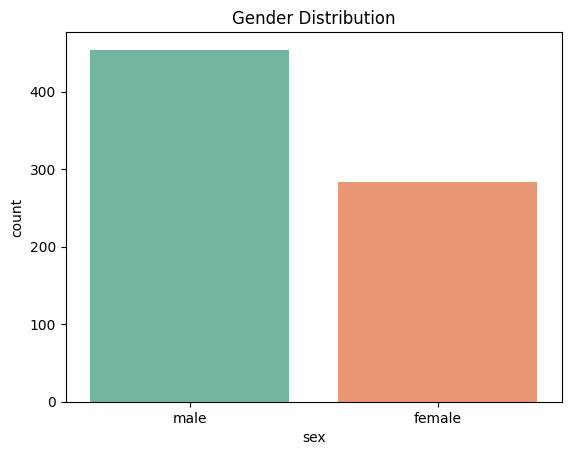

In [17]:

# Gender Distribution
sns.countplot(x='sex', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()


## Bivariate Analysis

C:\Users\drish\AppData\Local\Temp\ipykernel_26680\3347104688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette='magma')


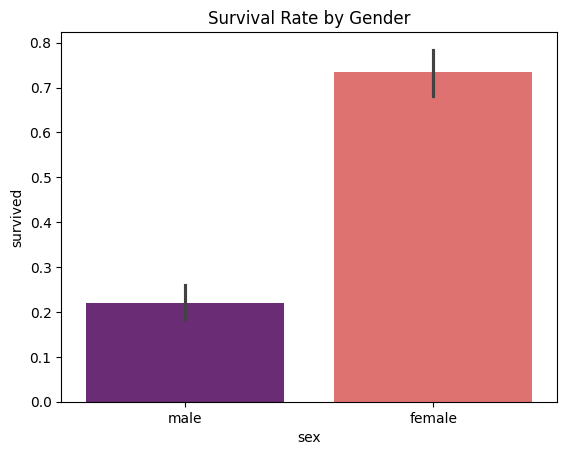

In [18]:

# Survival Rate by Gender
sns.barplot(x='sex', y='survived', data=df, palette='magma')
plt.title("Survival Rate by Gender")
plt.show()


C:\Users\drish\AppData\Local\Temp\ipykernel_26680\1038570035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, palette='Blues')


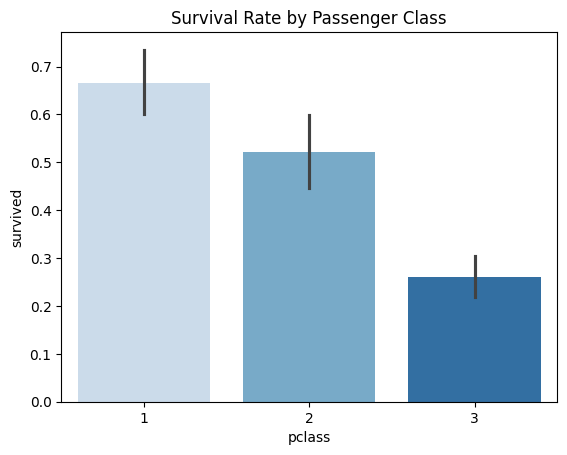

In [20]:

# Survival Rate by Passenger Class
sns.barplot(x='pclass', y='survived', data=df, palette='Blues')
plt.title("Survival Rate by Passenger Class")
plt.show()


## Multivariate Analysis

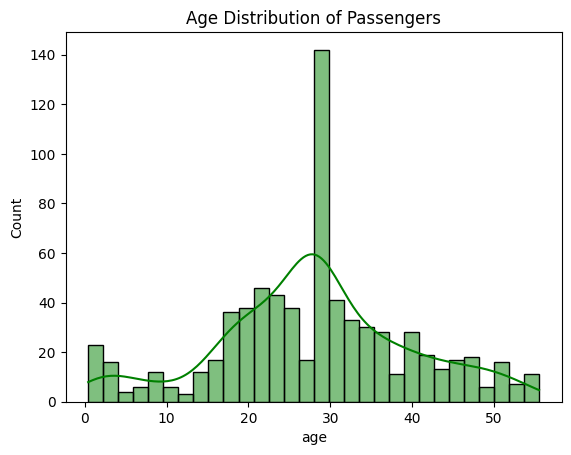

In [21]:

# Age Distribution
sns.histplot(df['age'], bins=30, kde=True, color='green')
plt.title("Age Distribution of Passengers")
plt.show()


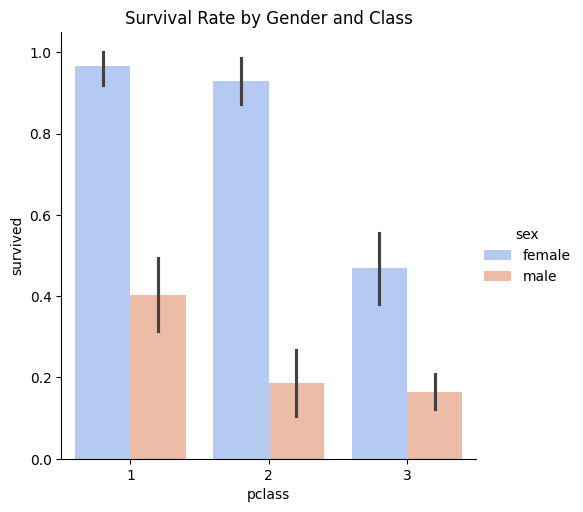

In [22]:

# Survival Rate by Gender and Class
sns.catplot(x='pclass', y='survived', hue='sex', kind='bar', data=df, palette='coolwarm')
plt.title("Survival Rate by Gender and Class")
plt.show()


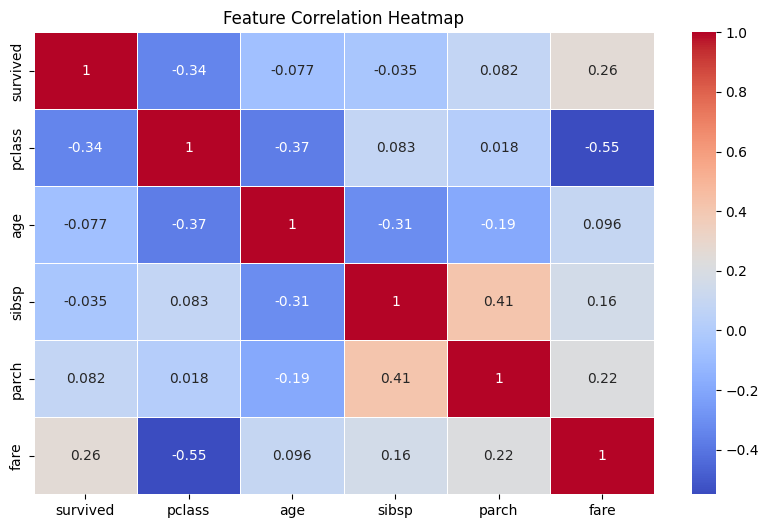

In [23]:

# Correlation Heatmap
plt.figure(figsize=(10, 6))
df = sns.load_dataset("titanic").select_dtypes(include=['number'])
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [24]:
# Create a new column 'family_size'
df['Family_size'] = df['sibsp'] + df['parch'] + 1

# Create a new column 'is_child' (1 if age < 16, else 0)
df['is_child'] = np.where(df['age'] < 16, 1, 0)


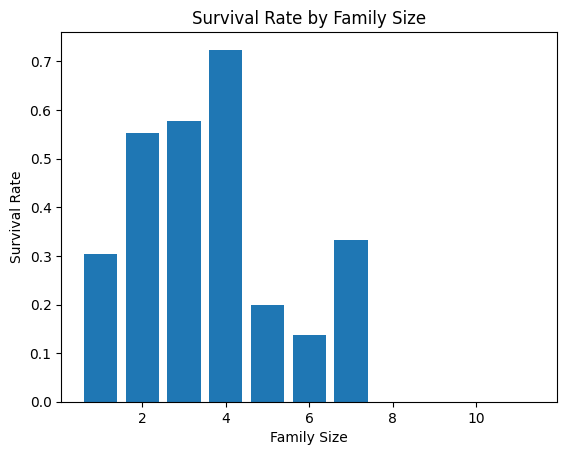

In [25]:
mean_survival = df.groupby(df['Family_size'])['survived'].mean()

# Plot using Matplotlib
plt.bar(mean_survival.index, mean_survival.values)


plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")

plt.show()